 # Uber Ride Prediction and Analaysis

## Introduction
This project analyzes uber ride data in New York city to find
trends in ride demand based on time and day.
we can use python for data analysis and visualization.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [26]:
# Load Datasets
df_apr14=pd.read_csv("uber-raw-data-apr14.csv")
df_may14=pd.read_csv("uber-raw-data-may14.csv")
df_jun14=pd.read_csv("uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("uber-raw-data-sep14.csv")


In [27]:
# Merge Data Into One
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

# Data Preparation

In [33]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [28]:
# Show first row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [29]:
# Renaming the Date/Time Columns
df = df.rename(columns={'Date/Time': 'Date_time'})

# Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])



# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name() 
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute


In [31]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [32]:
df.describe(include="all")

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,NaN,NaN,NaN,5,6,7,NaN,NaN,NaN
top,NaN,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,1.600000e+01,1.500000e+01,2.900000e+01
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,2.300000e+01,1.900000e+01,4.400000e+01
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,NaN,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


# 2 Exploratin and Visualization

Through our exploration we are going to visualize and analyse:
- The number of trips by hour
- The number of trips by month
- The number of trips by weekday
- The number of trips by day


- The number of trips by hour and month
- The number of trips by weekday and hour
- The number of trips by weekday and month



 # 2.1 Trips by Hour

In [34]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


# Plotting The Results

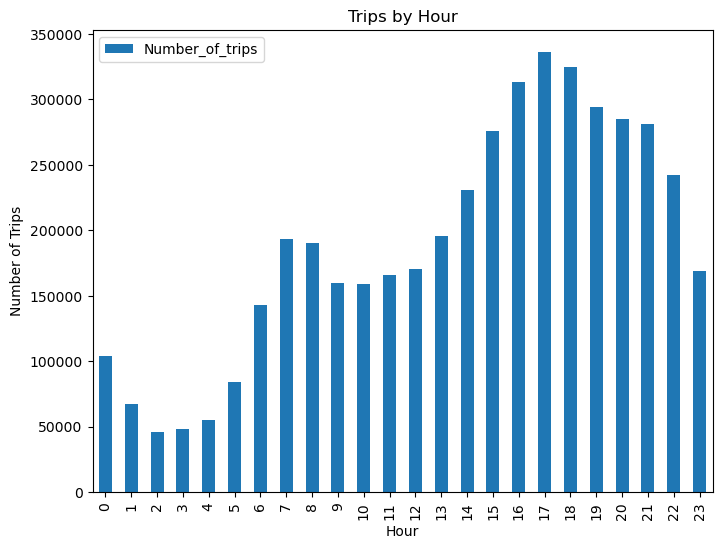

In [36]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

# Analysing The Results

In [37]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))

The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


We observe that the number of trips are higher around 16:00 and 18:00, with a spike at 17:00. It matches the end of a working day in the United States (16:30), the time when the workers go home.

We can say that the majority of Uber's clients are workers.

# 2.2 Trips by Months

In [39]:
#Grouping by Month 
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 

df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


# Plotting the Results

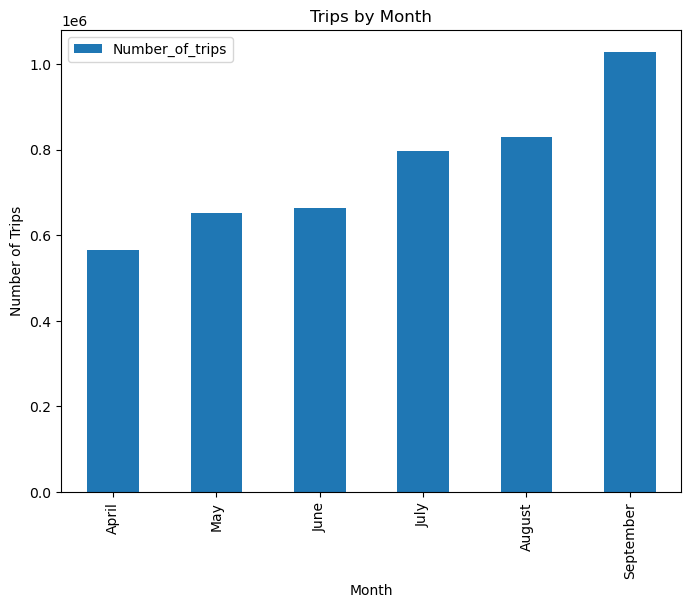

In [40]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

# Analysing the Results


We observe that the number of trips increases each month, with a peak increase between August and September.

In [41]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))

The ratio of the increase from August to September is 24 %.


From our results we can say that from April to September 2014, Uber was in a continuous improvement process.

# 2.3 Trips by Weekday

In [42]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday

,Number_of_trips
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114
Sunday,490180
Monday,541472


# Plotting the Results

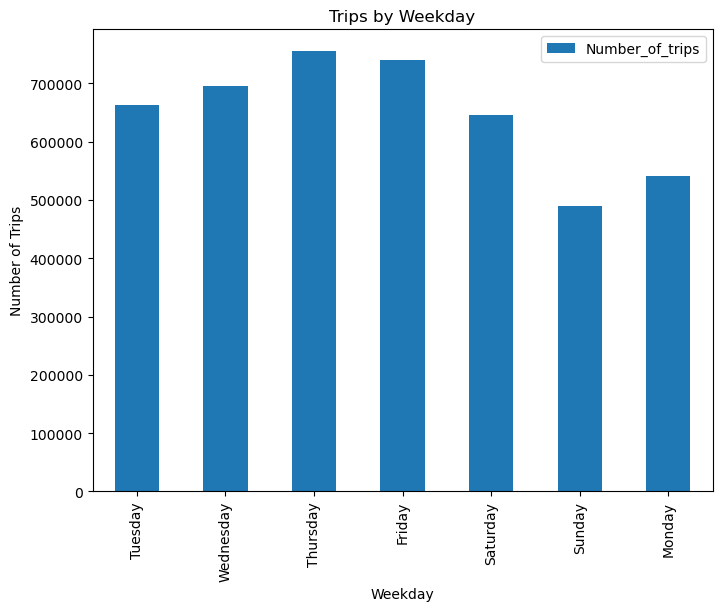

In [43]:
df_weekday.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

# Analysing the Results

In [44]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))

The lowest number of trips by weekday is 490180 trip, that corresponds to Sunday.


In [45]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 19.6% higher than the mean number of trips during weekends.


As the ratio between workdays and weekends only 19.6%, and because of the low number of trips on Monday, it cannot be said that people use Uber on workdays more than on weekends.

We need to investigate more to find out why the number of trips on mondays is as low.

# Tips by Day

In [46]:
#Grouping by Day
df_day_grouped = df.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 

df_day.head()

,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


# Plotting the Results

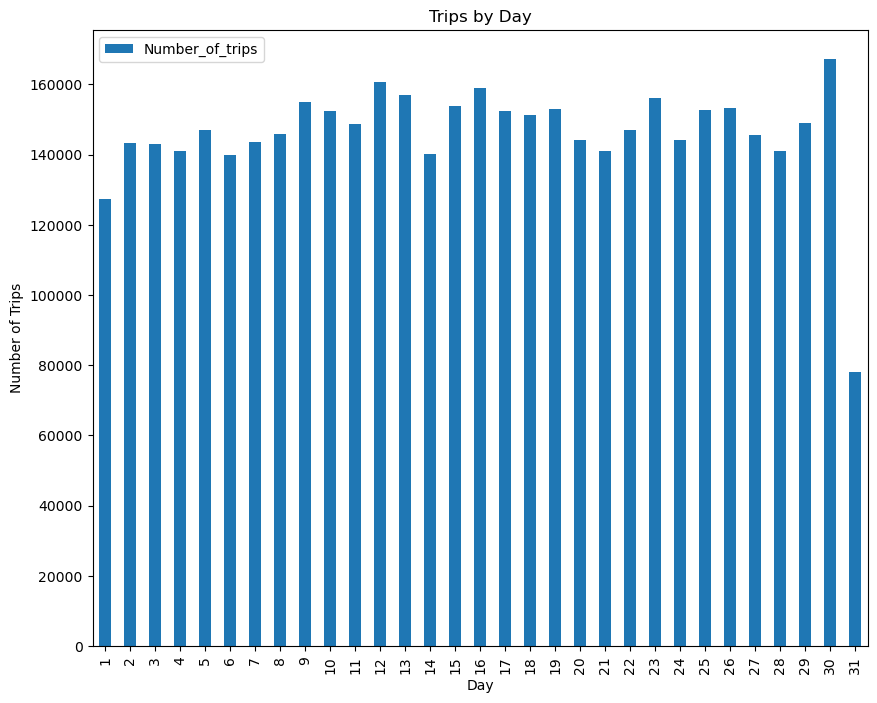

In [47]:
df_day.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

# Analysing the Results

The number of trips for the day 31 is a lot less than the others because April, June and September have 30 days.

The day with the highest number of trips is the 30. There's not much variation from day to day.

# 2.5 Trips by Hour and Month

In [49]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [50]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [51]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our 
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [52]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


# Plotting the Results

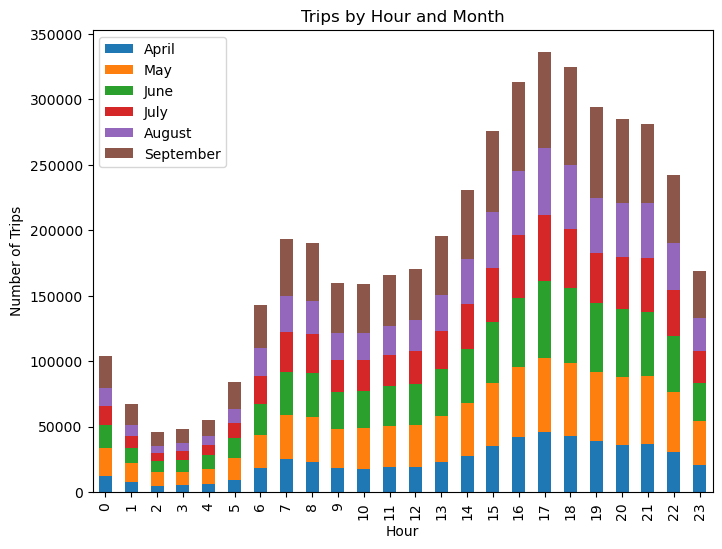

In [54]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')


plt.show()

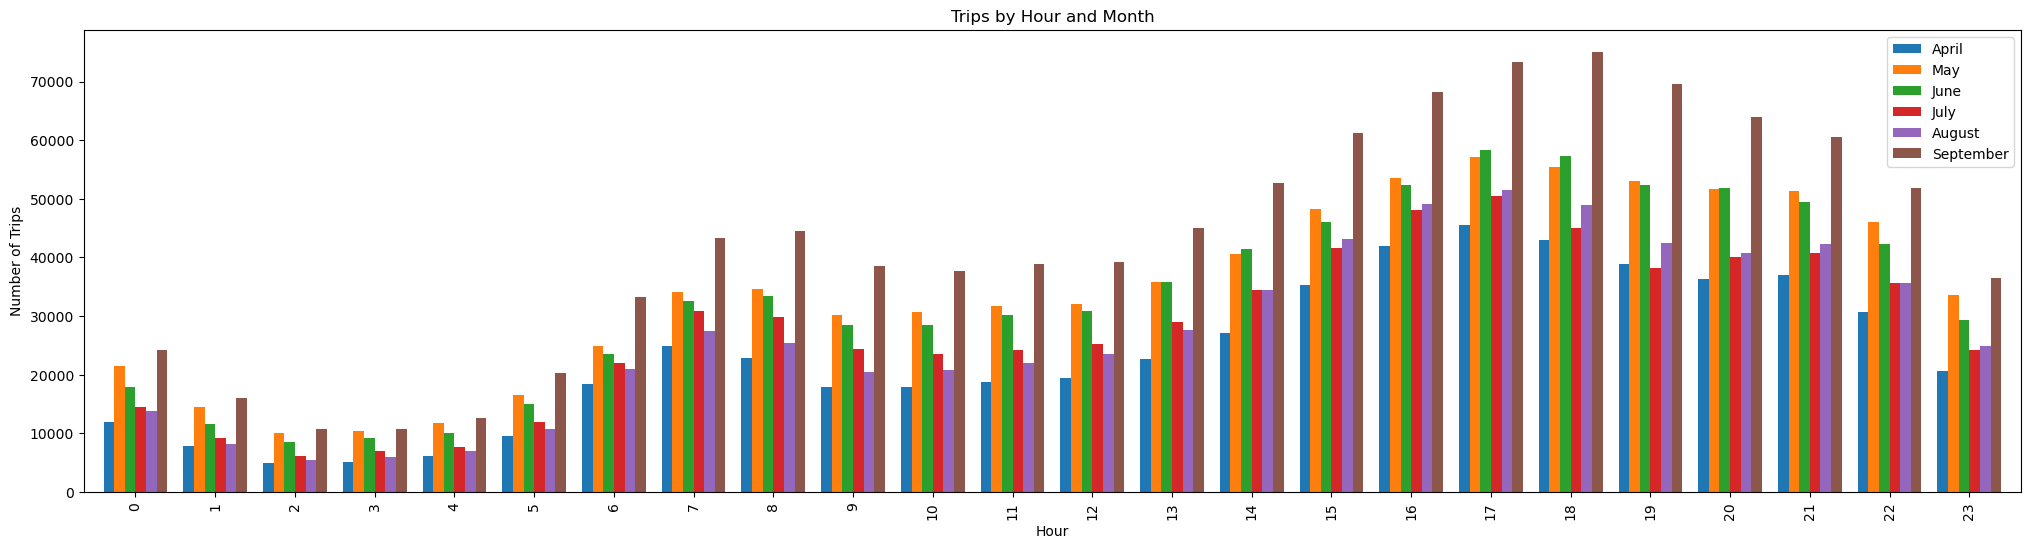

In [55]:
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

# Trips Weekdays and Hours

In [56]:
#Grouping by Hour and weekday
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort = False).count()

#Creating the grouped DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 

df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

In [57]:
#Reseting the Index
df_weekday_hour.reset_index(inplace= True)

#Preparing the Number of trips data
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174


# Plotting the Results

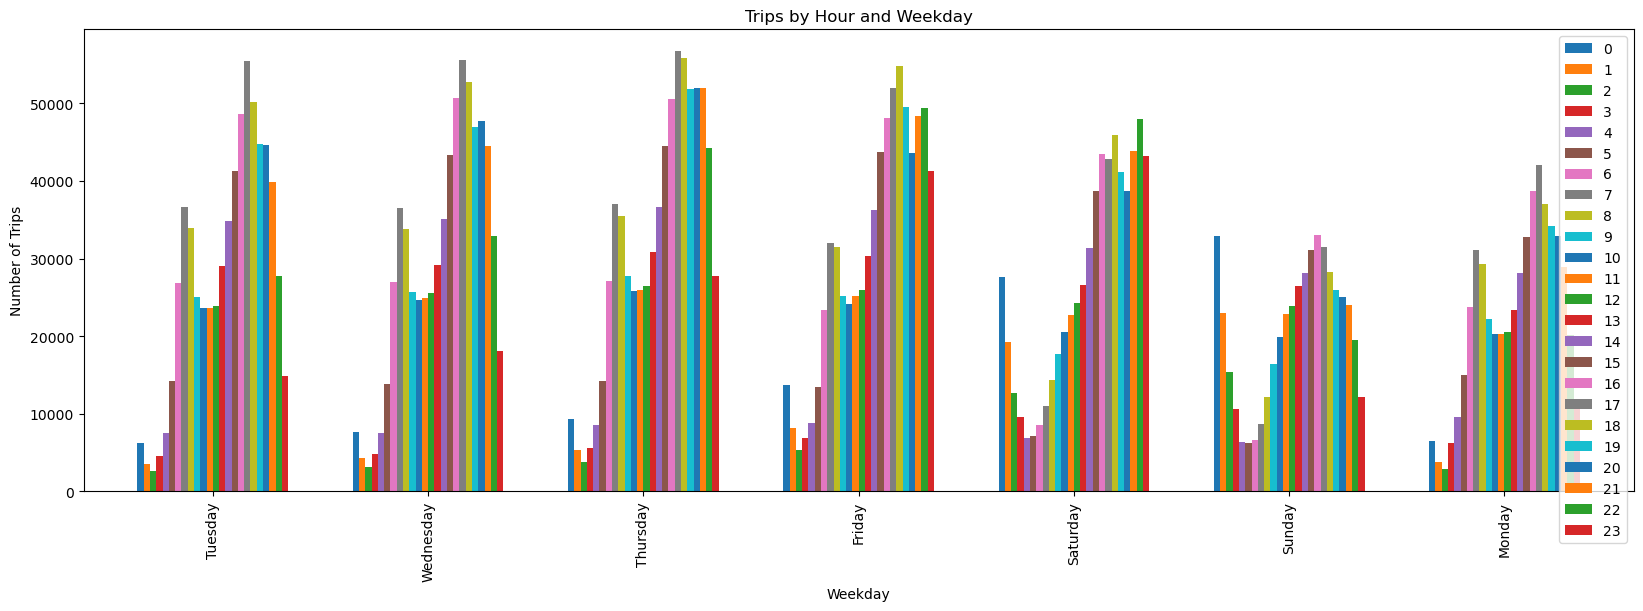

In [59]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

# Analysing the Results

We see that in working days there's a pulse at 7:00 and 8:00, it corresponds to the hour where the employees go to work. This pulse is not present on weekend days.

At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.

# 2.7 Trips by Weekday and Month

In [61]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [62]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,91185,108631,85067,90303,77218,51251,60861
May,128921,133991,102990,56168,63846,76662,89857
June,79656,94655,88134,99654,115325,105056,81364
July,137454,147717,148439,102735,90260,76327,93189
August,148674,132225,110246,91633,107124,115256,124117


# Plotting the Results

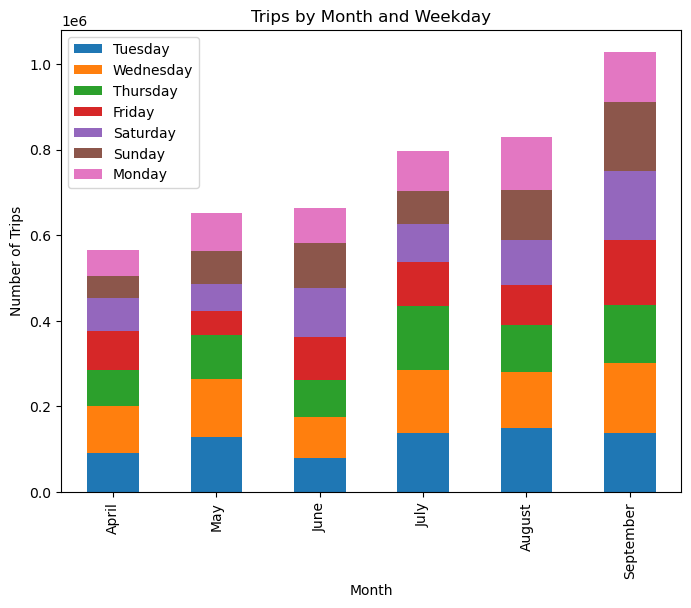

In [63]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked = True)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

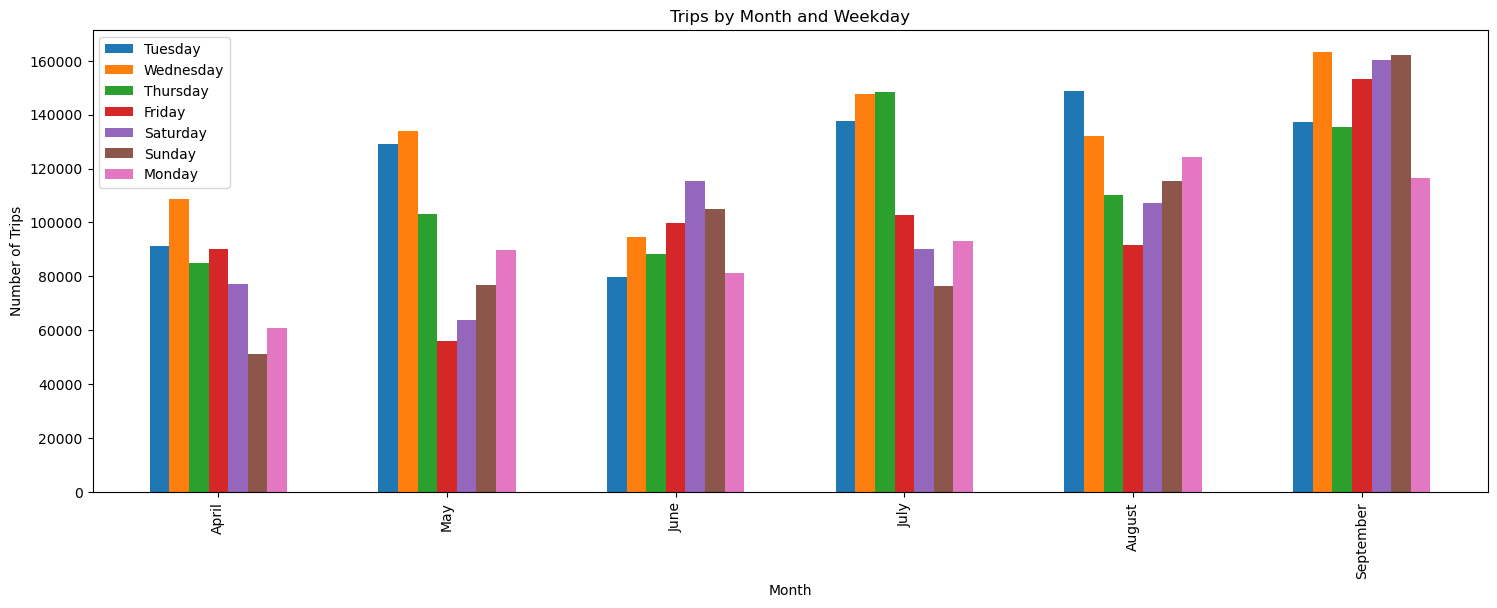

In [64]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

# 3 Heat Map

Through our exploration we are going to visualize:
- Heatmap by Hour and Day.
- Heatmap by Hour and Weekday.
- Heatmap by Month and Day.
- Heatmap by Month and Weekday.

In [65]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

# 3.1 Heat Map by Hour and Day

In [67]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8624\1979233098.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()


Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788


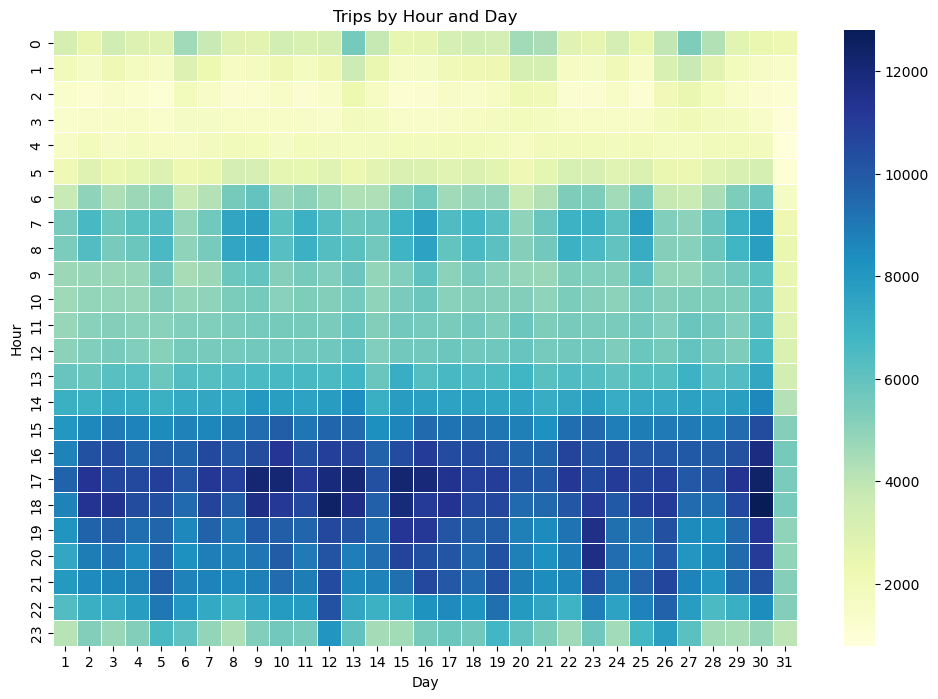

In [71]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap='YlGnBu', linewidth = .5)
ax.set(title="Trips by Hour and Day");
plt.show()

# Analysing the Results

We see that the number of trips in increasing throughout the day, with a peak demand in the evening between 16:00 and 18:00.

It corresponds to the time where employees finish their work and go home.

# Heatmap by Hour and Weekday

In [73]:
df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8624\739661458.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()


Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Hour,,,,,,,
0,6237,7644,9293,13716,27633,32877,6436
1,3509,4324,5290,8163,19189,23015,3737
2,2571,3141,3719,5350,12710,15436,2938
3,4494,4855,5637,6930,9542,10597,6232
4,7548,7511,8505,8806,6846,6374,9640


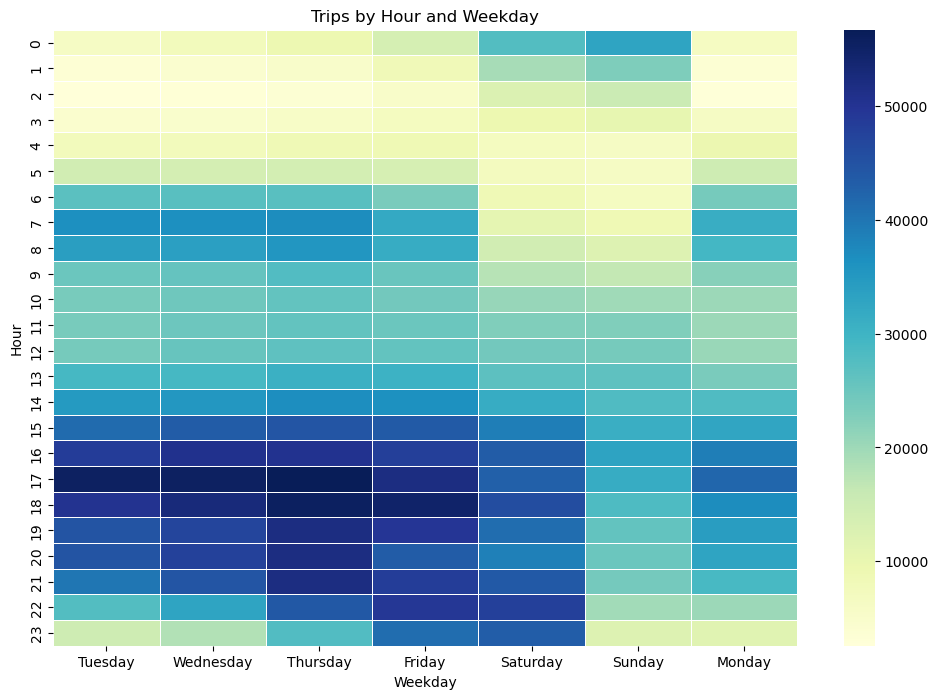

In [75]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap='YlGnBu', linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

# Analysing the Results

We can see that on working days (From Monday to Friday) the number of trips is higher from 16:00 to 21:00. It shows even better what we said from the first heatmap.

On Friday the number of trips remains high until 23:00 and continues on early Saturday. It corresponds to the time where people come out from work, then go out for dinner or drink before the weekend.

We can notice the same pattern on Saturday, people tend to go out at night, the number of trips remains on high until early Sunday.

# 3.3 Heatmap by Day and Month

In [76]:
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8624\659767156.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()


Month,April,May,June,July,August,September
Day,,,,,,
1,14546.0,23375.0,15967.0,21228.0,32353.0,19961.0
2,17474.0,24235.0,17503.0,26480.0,28678.0,28831.0
3,20701.0,22234.0,22674.0,21597.0,23146.0,32631.0
4,26714.0,13918.0,22831.0,14148.0,24952.0,38360.0
5,19521.0,17859.0,28371.0,10890.0,28094.0,42319.0


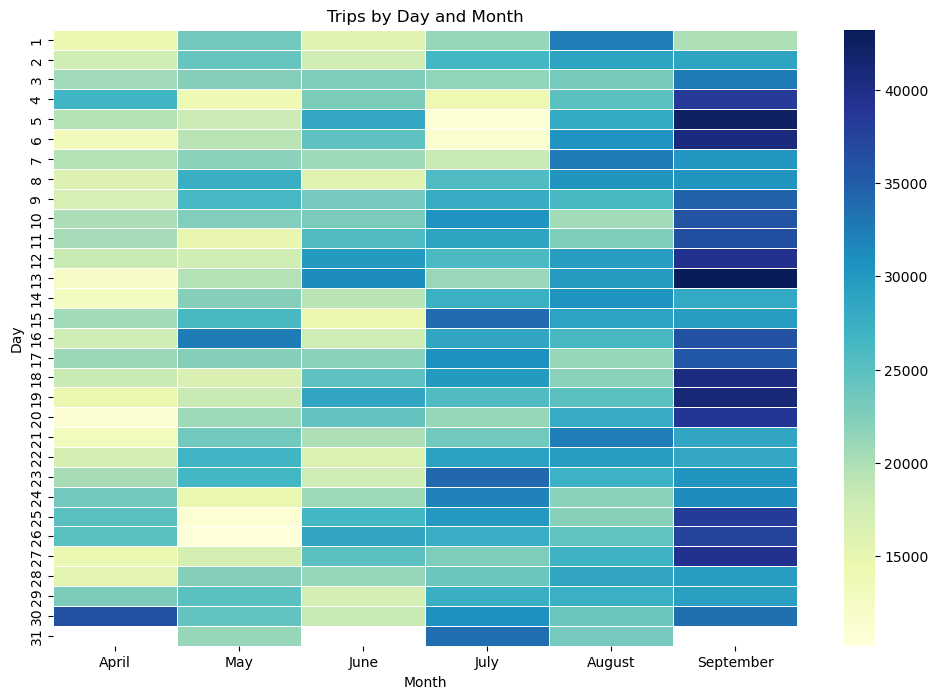

In [78]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = 'YlGnBu', linewidth = .5)
ax.set(title="Trips by Day and Month");

# Analysing the Results

We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.

We can notice from the visualization a dark spot, it corresponds to the 30 April. The number of trips that day was extreme compared to the rest of the month.

Unfortunatly we have not been able to find any factual information to explain the pulse. A successful marketing strategy can be assumed to be in place that days. So as the analysis go on we consider that day an outliner.

In [80]:
#The number of trips the 30th of April
max_april = max(df_day_month['April'])

#The mean number of trips the rest of April
mean_rest_april = df_day_month['April'][0:29].sum() / 29

ratio_april = round(max_april / mean_rest_april)
print('The number of trips the 30th of April is {} times higher than the mean number of trips during the rest of the month'.format(ratio_april))

The number of trips the 30th of April is 2 times higher than the mean number of trips during the rest of the month


# Heatmap by Month and Weekday

In [81]:
df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()
df_month_weekday.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8624\3684975110.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()


Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Month,,,,,,,
April,91185,108631,85067,90303,77218,51251,60861
May,76662,89857,128921,133991,102990,56168,63846
June,88134,99654,115325,105056,81364,79656,94655
July,137454,147717,148439,102735,90260,76327,93189
August,107124,115256,124117,148674,132225,110246,91633


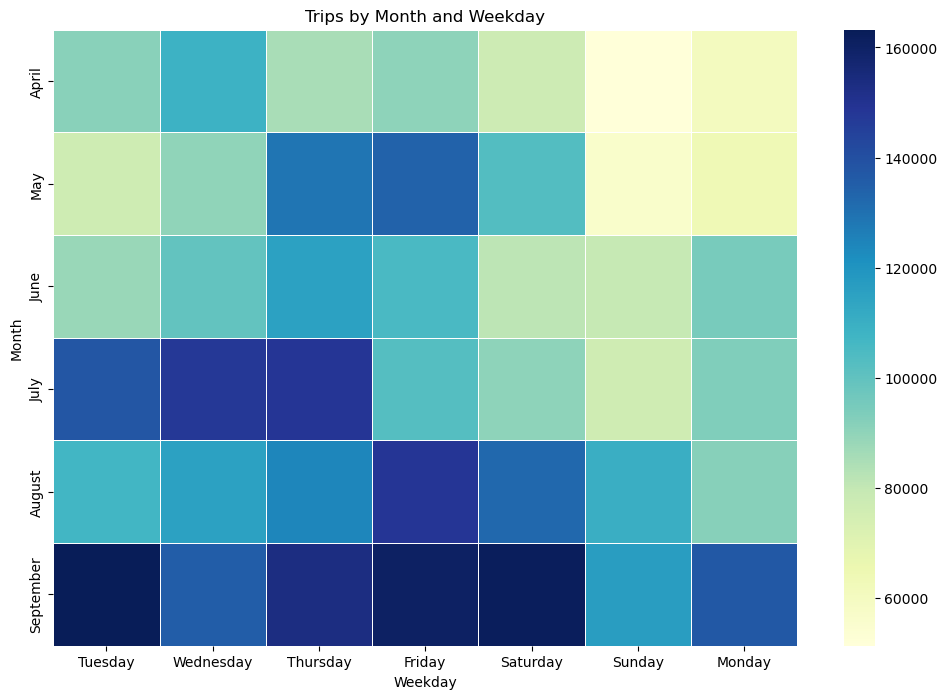

In [83]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_month_weekday, cmap= 'YlGnBu', linewidth = .5)
ax.set(title="Trips by Month and Weekday");

# 4. Conclusion

Through our analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:
- The peak demand hour 17:00.
- The main customer category are workers.
- An indicator of Uber's improvement from April to September.
- People tend to use Uber to go to work around 7:00 and 8:00 on working days.
- People tend to use Uber late at night (around midnight) during weekends.
- We should investigate why people don't use uber on Mondays as much as they do on other working days.

# Uber Ride Prediction Model (Bonus)

This section uses a simple Linear Regression model to predict Uber Ride demand based on Hour and Weekday.

In [84]:
 Import required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
# Prepare Data (Assume df already loaded earlier)


df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Hour'] = df['Date_time'].dt.hour
df['Weekday'] = df['Date_time'].dt.weekday

X = df[['Hour', 'Weekday']]
y = df.groupby(['Hour', 'Weekday'])['Base'].transform('count')

In [94]:
# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Step 4: Train Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [96]:
# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 98188861.31730843


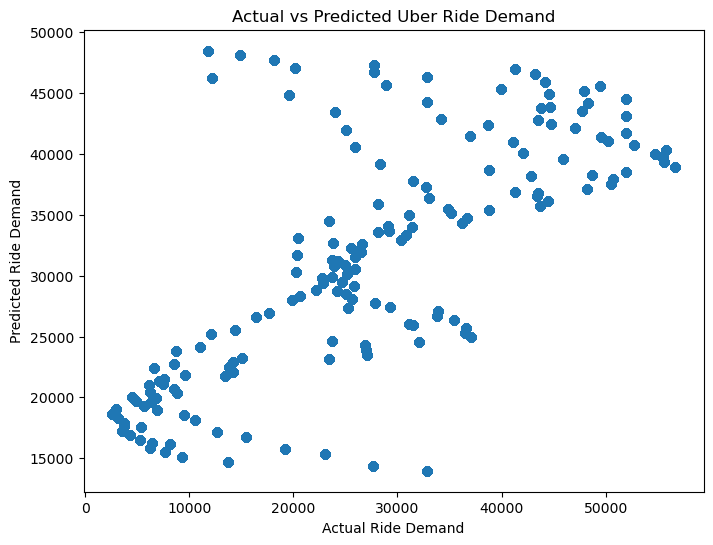

In [97]:
# Step 6: Visualize Results
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ride Demand")
plt.ylabel("Predicted Ride Demand")
plt.title("Actual vs Predicted Uber Ride Demand")
plt.show()

# Final Conclusion (bonus model)

Uber Ride Prediction and Analysis Project

In this project, we predicted Uber ride demand using a machine learning model. After preprocessing the data and training the model, we visualized the results using a scatter plot comparing actual and predicted ride demand.

- The scatter plot shows a reasonable correlation between predicted and actual values.
- The Mean Squared Error (MSE) was approximately 98 million, which indicates the average squared difference between actual and predicted demand.
- The model can be further improved with feature engineering, outlier handling, or using more advanced algorithms.

This project helped in understanding data analysis, model training, and visualizing performance effectively.